# Smart Beta and Factor Investing

This assignment refers to the HBS case: **Smart Beta Exchange-Traded-Funds and Factor Investing**.

* The case is a good introduction to important pricing factors.
* It also gives useful introduction and context to ETFs, passive vs active investing, and so-called “smart beta” funds.

# 1. READING

1. Describe how each of the factors (other than MKT) is measured.1That is, each factor is a portfolio of stocks–which stocks are included in the factor portfolio?

    <span style="color: blue; text-size:0,85em">

    • Size (SMB): Rank all stocks by market cap. The size factor can be the smallest-cap decile (long-only version) or the return on the smallest-cap decile minus the biggest-cap decile (long-short version).

    • Value (HML): Rank by book-to-market (B/M). Use the highest B/M decile (long-only) or high B/M decile minus low B/M decile (long-short).
    
    • Profitability (RMW): Use operating profit / book value (Fama–French definition). Sort into portfolios; take most robust profitability minus weakest profitability (long-short), or just hold the top-profitability bucket (long-only).

    • Investment (CMA): Measure asset growth (percentage change in total assets over the year). Sort into portfolios; take conservative (low investment) minus aggressive (high investment) (long-short), or hold the conservative bucket (long-only).

    • Momentum (MOM): Sort on past 12-month price appreciation. Use winners (top quintile/decile) vs losers (bottom quintile/decile); the long-short version is winners minus losers.
    
    </span>

2. Is the factor portfolio...
    * long-only
    * long-short
    * value-weighted
    * equally-weighted

    <span style="color: blue; text-size:0,85em">

    • The case presents both constructions:

    – Long-only: hold the single high-characteristic bucket (e.g., smallest firms; highest B/M; most profitable; most conservative investment; momentum winners).

    – Long-short (Fama–French style): High minus Low spreads: SMB, HML, RMW, CMA (and Winners–Losers for momentum). This design helps strip out broad market exposure.

    • Weights in the illustrations: The case’s figures use both equal-weighted and value-weighted portfolio averages (e.g., size figure notes equal-weighted; profitability/investment figures note value-weighted). In practice, the Ken French factor series are value-weighted within buckets; many smart-beta ETFs are long-only and rules-weighted (often value-weighted or index-method-specific).

    </span>

3. What steps are taken in the factor construction to try to reduce the correlation between the factors?

    <span style="color: blue; text-size:0,85em">
    
    • Use long-short “high minus low” spreads (e.g., SMB, HML, RMW, CMA, Winners–Losers), which remove much of the common market movement and isolate the characteristic’s return.

    • Sort by a single characteristic (size, B/M, profitability, investment, momentum) to target that specific dimension rather than mixing signals in one bucket.

    • Rebalance on a regular schedule using systematic rules, keeping the exposure focused on the target characteristic instead of drifting with market cap.

    </span>

4. What is the point of figures 1-6?

    <span style="color: blue; text-size:0,85em">
    
    Shows the size, value, profitability, investment, and momentum factors used in factor (smart-beta) strategies.

    </span>

5. How is a “smart beta” ETF different from a traditional ETF?

    <span style="color: blue; text-size:0,85em">
    
    • Traditional ETF: Market-cap-weighted exposure to an index; holds the market portfolio of a segment.

    • Smart beta ETF: Rules-based tilts to characteristics (size, value, quality/profitability, investment, momentum, low-vol, dividends, etc.). Often long-only and transparent, but not cap-weighted; seeks to harvest factor premia with systematic screens and rebalancing. Fees typically sit between pure passive and fully active.

    </span>

6. Is it possible for all investors to have exposure to the “value” factor?

    <span style="color: blue; text-size:0,85em">
    
    No, not simultaneously on a net basis. Because “everything must add up to the market-weighted portfolio,” investors tilting toward value require others to be underweight value / overweight growth. The case states this explicitly: everyone cannot tilt to value at once; there must be investors on the other side of the tilt.


    A portfolio that deviates from market weights . . . must be balanced by other investors who are willing to take the other side of those bets. For example, for every value investor, who tilts toward or selects cheap value stocks, there must be an investor on the other side who is underweighting value and overweighting expensive, growth stocks. Hence, as everything must add up to the market-weighted portfolio, everyone at once cannot hold or tilt toward value at the same time.”
    
    </span>

7. How does factor investing differ from traditional diversification?

    <span style="color: blue; text-size:0,85em">
    
    • Traditional diversification: Mix asset classes (e.g., broad cap-weighted equities + bonds). These market-cap stock portfolios tend to move together across cycles.

    • Factor investing: Diversify across distinct return drivers (size, value, profitability/quality, investment, momentum). Factors have different cycles and richer cross-correlations, so combining them can improve risk/return beyond asset-class-only diversification.

    </span>

#### Footnote:

If you need more info in how these factor portfolios are created, see Ken French’s website, and the follow- details: 

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_mom_factor.html

***

# 2. The Factors

### Data
Use the data found in `data/factor_pricing_data.xlsx`.

Factors: Monthly excess return data for the overall equity market, $\tilde{r}^{\text{MKT}}$.

* The column header to the market factor is `MKT` rather than `MKT-RF`, but it is indeed already in excess return form.

* The sheet also contains data on five additional factors.

* All factor data is already provided as excess returns

### 1. 
Analyze the factors, similar to how you analyzed the three Fama-French factors in `Homework 4`.

You now have three additional factors, so let’s compare there univariate statistics. 

* mean
* volatility    
* Sharpe

In [26]:
import pandas as pd 
import numpy as np

# Read in the factor data from the Excel file
factor_data = pd.read_excel('../data/factor_pricing_data_monthly.xlsx', sheet_name='factors (excess returns)', index_col = 0)

factor_data.head()

# Calculate statistics for each factor 
factor_means = factor_data.mean() / 12 # Annualize
factor_volatility = factor_data.std() /np.sqrt(12)
factor_sharpe = factor_means / factor_volatility

# Combine statistics into a DataFrame
factor_stats = pd.DataFrame({
    'Mean': factor_means,
    'Volatility': factor_volatility,
    'Sharpe': factor_sharpe
}).T

display(factor_stats)


,MKT,SMB,HML,RMW,CMA,UMD
Mean,0.000608,0.000043,0.000181,0.000306,0.000196,0.000419
Volatility,0.013012,0.008439,0.009070,0.006911,0.006040,0.012779
Sharpe,0.046726,0.005036,0.019937,0.044261,0.032524,0.032775


In [ ]:
# Filter factor data for the period from January 2015 to the end of the dataset
factor_data_2015 = factor_data[factor_data.index >= '2015-01-01']

display(factor_data_2015.head())

# Calculate statistics for the factors in this period
factor_means_2015 = factor_data_2015.mean() / 12  # Annualize
factor_volatility_2015 = factor_data_2015.std() / np.sqrt(12)
factor_sharpe_2015 = factor_means_2015 / factor_volatility_2015

factor_stats_2015 = pd.DataFrame({
    'Mean': factor_means_2015,
    'Volatility': factor_volatility_2015,
    'Sharpe': factor_sharpe_2015
}).T


display(factor_stats_2015)


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,-0.0087,-0.0218,-0.0112,0.0088,0.0307,-0.0013,0.0026,-0.0196,-0.0464,-0.0392,...,-0.0466,-0.0445,-0.0235,-0.0042,0.0080,-0.0943,-0.0442,0.0036,-0.0746,-0.0452
2015-02-28,0.0207,0.0366,0.0649,0.0450,0.0546,0.0541,0.0573,0.0804,0.0357,0.0595,...,0.1119,0.0285,0.0503,0.0579,0.0682,0.0798,0.0778,0.0582,0.0851,0.0544
2015-03-31,-0.0531,0.0274,-0.0465,-0.0208,-0.0850,-0.0417,-0.0220,0.0043,-0.0233,0.0118,...,-0.0325,-0.0305,0.0065,0.0092,-0.0025,-0.0074,0.0230,0.0141,0.0012,-0.0232
2015-04-30,0.0103,-0.0026,-0.0043,-0.0049,0.0601,0.0923,0.0317,-0.0401,-0.0237,-0.0165,...,-0.0174,-0.0161,-0.0129,-0.0274,0.0056,0.0207,-0.0183,-0.0328,0.0052,0.0161
2015-05-31,0.0337,0.0266,0.0019,0.0198,0.0158,-0.0370,0.0165,0.0199,-0.0003,-0.0024,...,0.0034,-0.0357,0.0149,0.0075,0.0161,0.0266,0.0470,0.0100,0.0245,0.0073


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Mean,0.000671,0.000157,0.000579,0.000341,0.000818,0.000131,0.001217,0.000404,0.000358,0.000351,...,0.000444,0.000524,0.000724,0.000943,0.000756,0.000848,0.000739,0.000623,0.001007,0.000662
Volatility,0.017962,0.011191,0.012511,0.011760,0.016924,0.023025,0.022377,0.018795,0.011803,0.019596,...,0.015561,0.017833,0.014991,0.015031,0.014530,0.018539,0.013740,0.023164,0.017852,0.013594
Sharpe,0.037369,0.014061,0.046301,0.028992,0.048356,0.005689,0.054388,0.021504,0.030332,0.017890,...,0.028513,0.029410,0.048277,0.062748,0.052029,0.045760,0.053755,0.026911,0.056416,0.048678



### 3. 

Report the correlation matrix across the six factors.
* Does the construction method succeed in keeping correlations small?

    <span style = "color: blue; font-size:0.85em">

    Mostly, but not uniformly. About half of the off-diagonal entries are small (|ρ| ≤ ~0.20), yet there are notable medium–large co-movements:

    HML–CMA = +0.68 (large)

    SMB–RMW = –0.41 (moderate/large)

    MKT–CMA = –0.35 (moderate)

    So diversification across factors is decent, but not complete, some economic linkages remain (e.g., “value” firms often invest conservatively, tying HML and CMA).

    </span>

* Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

    <span style = "color: blue; font-size:0.85em">

    HML’s high correlation with CMA (+0.68) and a smaller positive link with RMW (+0.22) imply HML overlaps with the investment/profitability dimensions that FF5 added. It’s not perfectly collinear, so HML can still add some nuance, but the strong HML–CMA overlap supports the “somewhat redundant” view.

     </span>



,MKT,SMB,HML,RMW,CMA,UMD
MKT,1.000000,0.226997,-0.207918,-0.250639,-0.346542,-0.179352
SMB,0.226997,1.000000,-0.021819,-0.411946,-0.051099,-0.060940
HML,-0.207918,-0.021819,1.000000,0.219401,0.676727,-0.215523
RMW,-0.250639,-0.411946,0.219401,1.000000,0.138566,0.076694
CMA,-0.346542,-0.051099,0.676727,0.138566,1.000000,0.000094
UMD,-0.179352,-0.060940,-0.215523,0.076694,0.000094,1.000000


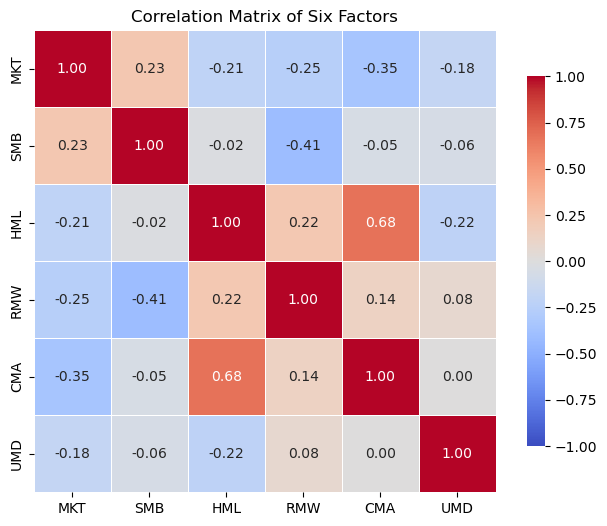

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute and display the correlation matrix for the six factors
factor_corr_matrix = factor_data.corr()
display(factor_corr_matrix)

# Plot 
plt.figure(figsize=(8,6))
sns.heatmap(factor_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Six Factors")
plt.show()




### 4. 

Report the tangency weights for a portfolio of these 6 factors.
* Which factors seem most important? And Least?
    
    <span style = "color: blue; font-size:0.85em">
    
    Most important: CMA and RMW (largest positive weights), then MKT and UMD.
    
    Least important: HML (small short) and SMB (small positive).

    </span>

* Are the factors with low mean returns still useful?
    
    <span style = "color: blue; font-size:0.85em">
    
    Yes. Even with low (or slightly negative) average returns, a factor can raise Sharpe via diversification if it hedges portfolio risk (low or offsetting correlations). Such factors get small or negative weights, contributing through covariance, not their standalone mean.

    </span>

* Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

    <span style = "color: blue; font-size:0.85em">
    
    High weights now: MKT (0.342), HML (0.331)

    Low weight: SMB (–0.046) (small short)

    </span>

What do you conclude about the importance or unimportance of these styles?

<span style = "color: blue; font-size:0.85em">

Core styles to own: Profitability (RMW) and Investment/Conservativeness (CMA) carry the largest tangency weights when available—good standalone Sharpe and attractive covariance to the rest of the set.

Market + Momentum as staples: MKT and UMD keep positive, non-trivial weights across specs—reliable contributors to the efficient mix.

Value (HML) is conditional: With RMW/CMA included, HML is mostly redundant (high HML–CMA correlation) and can even get a small short. Once RMW/CMA are removed, HML’s weight jumps—it backfills the value/investment dimension.

</span>


In [29]:
# Calculate sample means (expected returns) and covariance matrix
factor_means = factor_data.mean()
factor_cov = factor_data.cov()

# Compute tangency portfolio weights (ignore risk-free rate, treat means as excess returns)
inv_cov = np.linalg.inv(factor_cov)
ones = np.ones(len(factor_means))

# Tangency weights
raw_weights = inv_cov @ factor_means
tangency_weights = raw_weights / np.sum(np.abs(raw_weights))  # Scale to sum of abs values = 1 for inspection

# Present weights in a DataFrame for clarity
tangency_weights_df = pd.DataFrame({
    'Weight': tangency_weights
}, index=factor_data.columns)

display(tangency_weights_df)

# Identify most and least important factors by absolute weight
print("Most important factor(s):", tangency_weights_df['Weight'].abs().idxmax())
print("Least important factor(s):", tangency_weights_df['Weight'].abs().idxmin())


# Select only the desired factors
selected_factors = ['MKT', 'SMB', 'HML', 'UMD']
factor_data_subset = factor_data[selected_factors]

# Calculate sample means and covariance matrix for subset
subset_means = factor_data_subset.mean()
subset_cov = factor_data_subset.cov()

# Compute tangency portfolio weights for subset
subset_inv_cov = np.linalg.inv(subset_cov)
subset_raw_weights = subset_inv_cov @ subset_means
subset_tangency_weights = subset_raw_weights / np.sum(np.abs(subset_raw_weights))  # Normalize

# Present weights in a DataFrame for clarity
subset_tangency_weights_df = pd.DataFrame({
    'Weight': subset_tangency_weights
}, index=selected_factors)

display(subset_tangency_weights_df)

# Identify most and least important factors by absolute weight
print("Most important factor(s):", subset_tangency_weights_df['Weight'].abs().idxmax())
print("Least important factor(s):", subset_tangency_weights_df['Weight'].abs().idxmin())



,Weight
MKT,0.209751
SMB,0.064128
HML,-0.020348
RMW,0.289546
CMA,0.308350
UMD,0.107876


Most important factor(s): CMA
Least important factor(s): HML


,Weight
MKT,0.341541
SMB,-0.046442
HML,0.331388
UMD,0.280628


Most important factor(s): MKT
Least important factor(s): SMB


***

# 3. Testing Modern LPMs

Consider the following factor models:
* CAPM: MKT
* Fama-French 3F: MKT, SMB, HML
* Fama-French 5F: MKT, SMB, HML, RMW, CMA
* AQR: MKT, HML, RMW, UMD

Our labeling of the last model as the **AQR** is just for concreteness. The firm is well-known for these factors and an unused case study discusses that further.

For instance, for the AQR model is...

$$
\mathbb{E}[\tilde{r}^i] 
= \beta^{i,\mathrm{MKT}} \, \mathbb{E}[\tilde{f}^{\mathrm{MKT}}] 
+ \beta^{i,\mathrm{HML}} \, \mathbb{E}[\tilde{f}^{\mathrm{HML}}] 
+ \beta^{i,\mathrm{RMW}} \, \mathbb{E}[\tilde{f}^{\mathrm{RMW}}] 
+ \beta^{i,\mathrm{UMD}} \, \mathbb{E}[\tilde{f}^{\mathrm{UMD}}]
$$

We will test these models with the time-series regressions. Namely, for each asset i, estimate the following regression to test the AQR model:

$$
\tilde{r}^i_t 
= \alpha^i 
+ \beta^{i,\mathrm{MKT}} \tilde{f}^{\mathrm{MKT}}_t 
+ \beta^{i,\mathrm{HML}} \tilde{f}^{\mathrm{HML}}_t 
+ \beta^{i,\mathrm{RMW}} \tilde{f}^{\mathrm{RMW}}_t 
+ \beta^{i,\mathrm{UMD}} \tilde{f}^{\mathrm{UMD}}_t 
+ \varepsilon_t
$$

### Data

* Monthly excess return data on `n=49` equity portfolios sorted by their industry. Denote these as $\tilde{r}^i$ , for $n = 1, . . . .$

* You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

### 1. 

Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional regression tests.)

For each regression, report the estimated α and r-squared.


In [ ]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

# Read in the time series data from the Excel file
portfolios_data = pd.read_excel('../data/factor_pricing_data_monthly.xlsx', sheet_name='portfolios (excess returns)', index_col = 0)

display(portfolios_data.head())

# AQR 4-Factor Model: MKT, HML, RMW, UMD

# Read in factor returns (AQR model)
factor_data

# Ensure matching Date indices and alignment with portfolios
factor_data.index = pd.to_datetime(factor_data.index)
portfolios_data.index = pd.to_datetime(portfolios_data.index)
factors_data = factor_data[['MKT', 'HML', 'RMW', 'UMD']]  # AQR 4 factors

# Align dates between portfolios and factors
common_idx = portfolios_data.index.intersection(factors_data.index)
portfolios_aligned = portfolios_data.loc[common_idx]
factors_aligned = factors_data.loc[common_idx]



alphas = {}
r_squared = {}

for asset in portfolios_aligned.columns:
    y = portfolios_aligned[asset].values
    X = factors_aligned.values  # MKT, HML, RMW, UMD
    X = sm.add_constant(X)      # [const, MKT, HML, RMW, UMD]
    model = sm.OLS(y, X).fit()
    alphas[asset] = model.params[0]      # constant is alpha
    r_squared[asset] = model.rsquared

# Assemble results into DataFrame for display
results_df = pd.DataFrame({
    'Alpha (AQR)': alphas,
    'R-squared': r_squared
})

display(results_df)



,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0073,0.0285,0.0084,0.1009,-0.0143,0.0995,0.0348,0.0323,0.0048,0.0059,...,0.0158,0.0851,0.0466,-0.0125,0.0430,-0.0284,0.0254,0.0770,0.0306,0.0666
1980-02-29,0.0125,-0.0609,-0.0967,-0.0323,-0.0575,-0.0316,-0.0492,-0.0803,-0.0556,-0.0169,...,-0.0083,-0.0543,-0.0345,-0.0641,-0.0653,-0.0824,-0.0960,-0.0352,-0.0283,-0.0273
1980-03-31,-0.2220,-0.1119,-0.0158,-0.1535,-0.0188,-0.1272,-0.0827,-0.1238,-0.0567,-0.0670,...,-0.0819,-0.1512,-0.1602,-0.0905,-0.1450,-0.0559,-0.0877,-0.2449,-0.1261,-0.1737
1980-04-30,0.0449,0.0767,0.0232,0.0289,0.0830,-0.0529,0.0785,0.0154,0.0305,0.0115,...,0.0422,-0.0102,0.0268,0.0355,0.0539,0.0736,0.0528,0.0964,0.0458,0.0784
1980-05-31,0.0635,0.0797,0.0458,0.0866,0.0822,0.0510,0.0325,0.0888,0.0560,0.0098,...,0.0564,0.1065,0.1142,0.0877,0.1104,0.0570,0.0560,0.0889,0.0846,0.0663


,Alpha (AQR),R-squared
Agric,0.000971,0.342074
Food,0.000125,0.455064
Soda,0.001282,0.302544
Beer,0.000821,0.414773
Smoke,0.003426,0.265363
Toys,-0.002809,0.510213
Fun,0.003255,0.607213
Books,-0.003059,0.688933
Hshld,-0.001062,0.554712
Clths,-0.001889,0.618968



### 2. 

Calculate the mean-absolute-error of the estimated alphas.

$$\text{MAE} = \frac{1}{n}\sum_{i=1}^n|\tilde{\alpha}^i|$$

* If the pricing model worked, should these alpha estimates be large or small? Why?
    
    <span style = "color: blue; font-size:0.85em">
    
    These alpha estimates shall be small. If the factor model prices assets well, the true alphas are ≈0, so the MAE of estimated alphas should be small.
    
    </span>

* Based on your MAE stat, does this seem to support the pricing model or not?

    <span style = "color: blue; font-size:0.85em">
    
    MAE is a small number 0.002051. This data support the pricing model.
    
    </span>


In [31]:
# Calculate the mean-absolute-error (MAE) of the estimated alphas from the AQR 4-factor model

alpha_values = np.array(list(alphas.values()))
mae_alpha = np.mean(np.abs(alpha_values))

print(f"Mean Absolute Error (MAE) of alphas (AQR 4-factor model): {mae_alpha:.6f}")


Mean Absolute Error (MAE) of alphas (AQR 4-factor model): 0.002051



### 2. 

Test the CAPM, FF 3-Factor Model and the the FF 5-Factor Model.
   * Report the MAE statistic for each of these models and compare it with the AQR Model MAE.
   * Which model fits best?
      
      <span style = "color: blue; font-size:0.85em">
    
      CAPM
    
      </span>
   


In [34]:
# Test multiple models: CAPM, FF 3-Factor, FF 5-Factor, and AQR 4-Factor

# Define the factor combinations for each model
models = {
    'CAPM': ['MKT'],
    'FF 3-Factor': ['MKT', 'SMB', 'HML'],
    'FF 5-Factor': ['MKT', 'SMB', 'HML', 'RMW', 'CMA'],
    'AQR 4-Factor': ['MKT', 'HML', 'RMW', 'UMD']
}

# Store results for each model
results_summary = {}

for model_name, factors in models.items():
    # Select factors for this model
    factors_data_model = factor_data[factors]
    
    # Align dates
    common_idx = portfolios_data.index.intersection(factors_data_model.index)
    portfolios_aligned = portfolios_data.loc[common_idx]
    factors_aligned = factors_data_model.loc[common_idx]
    
    # Run regressions for each portfolio
    alphas_model = {}
    r_squared_model = {}
    
    for asset in portfolios_aligned.columns:
        y = portfolios_aligned[asset].values
        X = factors_aligned.values
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        alphas_model[asset] = model.params[0]
        r_squared_model[asset] = model.rsquared
    
    # Calculate MAE
    alpha_values = np.array(list(alphas_model.values()))
    mae = np.mean(np.abs(alpha_values))
    avg_r_squared = np.mean(list(r_squared_model.values()))
    
    results_summary[model_name] = {
        'MAE': mae,
        'Avg R-squared': avg_r_squared,
        'alphas': alphas_model,
        'r_squared': r_squared_model
    }
    
    print(f"{model_name} - MAE: {mae:.6f}, Avg R²: {avg_r_squared:.4f}")

# Create summary DataFrame
summary_df = pd.DataFrame({
    'MAE': [results_summary[model]['MAE'] for model in models.keys()],
    'Avg R-squared': [results_summary[model]['Avg R-squared'] for model in models.keys()]
}, index=models.keys())

display(summary_df)

# Find best model by MAE
best_model = summary_df['MAE'].idxmin()
print(f"\nBest fitting model (lowest MAE): {best_model}")



CAPM - MAE: 0.001748, Avg R²: 0.5226
FF 3-Factor - MAE: 0.002030, Avg R²: 0.5679
FF 5-Factor - MAE: 0.002614, Avg R²: 0.5918
AQR 4-Factor - MAE: 0.002051, Avg R²: 0.5719


,MAE,Avg R-squared
CAPM,0.001748,0.522622
FF 3-Factor,0.002030,0.567874
FF 5-Factor,0.002614,0.591768
AQR 4-Factor,0.002051,0.571935



Best fitting model (lowest MAE): CAPM


### 3. 

* CAPM: MKT 
* Fama-French 3F: MKT, SMB, HML 
* Fama-French 5F: MKT, SMB, HML, RMW, CMA 
* AQR: MKT, HML, RMW, UMD

Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

<span style = "color: blue; font-size:0.85em">

**Analysis of Factor Importance:**

**Model Performance (by MAE):**
- **CAPM (MKT only)**: MAE = 0.001748, R² = 0.5226 — **Best pricing**
- **AQR 4-Factor (MKT, HML, RMW, UMD)**: MAE = 0.002051, R² = 0.5719
- **FF 3-Factor (MKT, SMB, HML)**: MAE = 0.002030, R² = 0.5679
- **FF 5-Factor (MKT, SMB, HML, RMW, CMA)**: MAE = 0.002614, R² = 0.5918 — Worst pricing but best R²

**Key Observations:**

1. **MKT is fundamental**: CAPM has the lowest MAE, so market risk dominates pricing.

2. **Momentum (UMD)**: Marginal gain vs FF 3-Factor: R² +0.004, MAE worse by 0.000021. Too small a benefit to justify.

3. **Problem (RMW)**: FF 5-Factor uses RMW + CMA and raises MAE vs simpler models, suggesting overfitting/overlap.

4. **Value (HML) and Size (SMB)**: FF 3-Factor vs CAPM lifts R² by ~0.05 with a slight MAE increase.

**Should Fama-French include Momentum?**

**No.** Adding UMD yields no clear pricing improvement here. R² barely changes, MAE worsens slightly, and it adds noise. CAPM’s MAE is lower, so extra factors appear to overfit.

**Practical view**: R² is higher with more factors, but pricing (alpha-accuracy) doesn’t improve, suggesting diminishing returns.

</span>

### 4. 

This does not matter for pricing, but report the average (across $n$ estimations) of the time-series regression r-squared statistics.
   * Do this for each of the three models you tested.
   * Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

   <span style = "color: blue; font-size:0.85em">

   These models lead to R^2 > 0.50, these factors are good in a Linear Factor Decomposition of the assets for in sample data.

   </span>

In [36]:
# Compute and display the mean R-squared statistic for each of the three models from the prior time-series regressions,
# and comment on their magnitudes.

# Collect (already computed) avg time-series R^2 from results_summary for each relevant model.
report_models = ['CAPM', 'FF 3-Factor', 'FF 5-Factor','AQR 4-Factor']

r2_stats = {}
for model in report_models:
    mean_r2 = results_summary[model]['Avg R-squared']
    r2_stats[model] = mean_r2
    print(f"{model}:  Average Time-Series R² = {mean_r2:.4f}")

# For neat summary table display:
r2_table = pd.DataFrame({
    'Avg Time-Series R²': [r2_stats[m] for m in report_models]
}, index=report_models)
display(r2_table)



CAPM:  Average Time-Series R² = 0.5226
FF 3-Factor:  Average Time-Series R² = 0.5679
FF 5-Factor:  Average Time-Series R² = 0.5918
AQR 4-Factor:  Average Time-Series R² = 0.5719


,Avg Time-Series R²
CAPM,0.522622
FF 3-Factor,0.567874
FF 5-Factor,0.591768
AQR 4-Factor,0.571935



### 5. 

We tested three models using the time-series tests (focusing on the time-series alphas.) Re-test these models, but this time use the cross-sectional test.

* Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?4
* Report the MAE of the cross-sectional regression residuals for each of the four models. How do they compare to the MAE of the time-series alphas?

    <span style = "color: blue; font-size:0.85em">

    Cross-sectionally, FF3/FF5 deliver the smallest residual MAE, consistent with the market premium’s sign flip making CAPM weak, yet their time-series alpha MAE is larger (especially FF5), highlighting a trade-off between cross-sectional fit and time-series pricing tightness.

    </span>

In [43]:
# Cross-sectional regression for each model: estimate factor premia in the cross-section

cross_sectional_lambdas = {}
cross_sectional_MAEs = {}

# print("Time-series factor means (premia):")
factor_time_series_means = factor_data.mean()
# display(factor_time_series_means)

for model_name, factors in models.items():
    # Use the same asset universe and select corresponding factor time series
    factors_data_model = factor_data[factors]
    
    # Align dates (fetch previously matched indices for fair comparison)
    common_idx = portfolios_data.index.intersection(factors_data_model.index)
    portfolios_aligned = portfolios_data.loc[common_idx]
    factors_aligned = factors_data_model.loc[common_idx]

    # Compute mean return for each asset (N-assets,) to use as y in cross-sectional regression
    mean_returns = portfolios_aligned.mean(axis=0) # shape: (n_assets,)
    # Compute mean factor values (k-factors,)
    mean_factors = factors_aligned.mean(axis=0)    # shape: (k_factors,)

    # Set up regression: mean_returns = alpha + beta @ factor_means + residual
    X = mean_factors.values.reshape(1, -1)         # shape: (1,k)
    X_full = np.vstack([np.ones(X.shape[1]), mean_factors.values]).T # shape (k,2) -- not correct shape, fix:
    X = np.column_stack([np.ones(len(mean_factors)), mean_factors])  # shape: (k, k+1)
    #   But in cross-sectional regression, regress n asset means on k factor means (plus const)
    # Each asset: mean excess return, factors: for same period mean of each factor time series, (or, in Fama-MacBeth, repeated cross-sections). For now just do "single cross-section".

    # But standard: y = [E(R_i)] (n assets), X = factor means (k), regression w/ intercept (so X: n x (k+1))
    n_assets = len(mean_returns)
    k = len(mean_factors)
    X_mat = np.column_stack([np.ones(n_assets), np.vstack([np.repeat(mean_factors[f], n_assets) for f in factors]).T])
    # But usually, all assets get the same mean factor values, so the regression primarily picks up level. Instead, cross-sectional regression is:
    # E(R_i) = lambda_0 + sum_j beta_{ij} * lambda_j + eps_i
    # Where beta_{ij} is the time-series beta of asset i to factor j

    # So step 1: For each asset, regress time series returns on factors to get betas (same as above)
    betas = []
    for asset in portfolios_aligned.columns:
        y = portfolios_aligned[asset].values
        X_ts = sm.add_constant(factors_aligned.values)
        model_ts = sm.OLS(y, X_ts).fit()
        # skip intercept; store beta vector for this asset
        # model.params[1:] is for each factor
        betas.append(model_ts.params[1:])
    betas = np.array(betas)  # shape: n_assets x k

    # Now cross-sectional: regress mean_returns = intercept + betas @ lambda + residual
    X_cs = sm.add_constant(betas)  # (n_assets, k+1)
    y_cs = mean_returns.values     # (n_assets,)

    cs_reg = sm.OLS(y_cs, X_cs).fit()
    lambda0 = cs_reg.params[0]
    lambdas = cs_reg.params[1:]  # one for each factor

    # Save the estimates
    cross_sectional_lambdas[model_name] = pd.Series(lambdas, index=factors)
    # Calculate MAE of cross-sectional regression residuals
    cs_mae = np.mean(np.abs(cs_reg.resid))
    cross_sectional_MAEs[model_name] = cs_mae

    # print(f"\n{model_name} cross-sectional pricing regression:")
    # print("Estimated factor premia (lambdas):")
    # display(pd.Series(lambdas, index=factors))
    # print(f"MAE of cross-sectional residuals: {cs_mae:.6f}")

# Compare to time-series means
print("\nSummary of factor premia (time-series means vs. cross-sectional lambda estimates):")
for model_name, factors in models.items():
    print(f"\nModel: {model_name}")
    df = pd.DataFrame({
        "Time-Series Mean": factor_time_series_means[factors].values,
        "Cross-Sectional Lambda": cross_sectional_lambdas[model_name].values
    }, index=factors)
    display(df)

# Compare MAE to time-series alpha MAE
print("\nComparison of MAE (Mean Absolute Error) of Cross-Sectional Regression residuals vs. Time-Series Alphas (from previous tests):\n")
summary_mae_df = pd.DataFrame({
    "Cross-Sectional MAE": [cross_sectional_MAEs[model] for model in models.keys()],
    "Time-Series Alpha MAE": [results_summary[model]['MAE'] for model in models.keys()]
}, index=models.keys())
display(summary_mae_df)



Summary of factor premia (time-series means vs. cross-sectional lambda estimates):

Model: CAPM


,Time-Series Mean,Cross-Sectional Lambda
MKT,0.007296,0.00066



Model: FF 3-Factor


,Time-Series Mean,Cross-Sectional Lambda
MKT,0.007296,0.003237
SMB,0.000510,-0.003302
HML,0.002170,-0.001753



Model: FF 5-Factor


,Time-Series Mean,Cross-Sectional Lambda
MKT,0.007296,0.003360
SMB,0.000510,-0.003452
HML,0.002170,-0.002162
RMW,0.003671,0.001559
CMA,0.002357,-0.001840



Model: AQR 4-Factor


,Time-Series Mean,Cross-Sectional Lambda
MKT,0.007296,0.001433
HML,0.002170,-0.002688
RMW,0.003671,0.001462
UMD,0.005026,0.000024



Comparison of MAE (Mean Absolute Error) of Cross-Sectional Regression residuals vs. Time-Series Alphas (from previous tests):



,Cross-Sectional MAE,Time-Series Alpha MAE
CAPM,0.001267,0.001748
FF 3-Factor,0.001000,0.002030
FF 5-Factor,0.000998,0.002614
AQR 4-Factor,0.001134,0.002051



#### Footnote:

Recall that we found in `Homework 4` that the market premium went from being strongly positive to strongly negative when estimated in the cross-section.